### 1. Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
)
from utils.utils import split_data, plot_confusion_matrix

2024-03-22 15:37:28.535762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 15:37:29.248105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 2. Loading the dataset

In [2]:
dataset = pd.read_csv('../dataset/dataset_final.csv')

In [3]:
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)

### 3. Splitting training, validation and testing data

In [4]:
train_df, test_df = train_test_split(
    dataset.sample(frac=1.0, random_state=42), 
    test_size=0.2, 
    random_state=42
)

In [5]:
_, _, test_data = split_data(train_df, test_df, image_width=150, image_height=150)

Found 25600 validated image filenames belonging to 2 classes.
Found 6400 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


### 4. Loading the VGG16 model

In [6]:
model = tf.keras.models.load_model('./models/trained/vgg_model.h5')

model.summary()

2024-03-22 15:37:44.931139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 15:37:44.961430: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### 5. Making predictions

In [7]:
y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int32)

2024-03-22 15:37:49.484930: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.
2024-03-22 15:37:49.524113: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


  1/250 [..............................] - ETA: 3:17

2024-03-22 15:37:50.123955: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.
2024-03-22 15:37:50.150020: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


  2/250 [..............................] - ETA: 2:34

2024-03-22 15:37:50.746279: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


250/250 [==============================] - 155s 621ms/step


In [10]:
print(y_pred)

[0 1 1 ... 0 0 0]


In [11]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
y = precision_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
z = recall_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')

In [12]:
print(f'F1 Score: {x}')
print(f'Precision Score: {y}')
print(f'Recall Score: {z}')

F1 Score: 0.9971250154981013
Precision Score: 0.9971415147352648
Recall Score: 0.997125


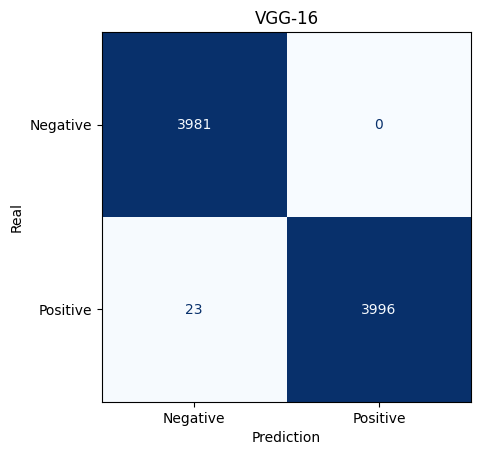

In [8]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title='VGG-16')

plt.show()

In [10]:
disp.figure_.savefig('./models/figures/vgg16/VGG-confusion-matrix.eps')
disp.figure_.savefig('./models/figures/vgg16/VGG-confusion-matrix.png')

### 6. Evaluating the model

In [7]:
loss, acc = model.evaluate(test_data)

250/250 [==============================] - 733s 3s/step - loss: 0.0112 - accuracy: 0.9971


In [8]:
print(f'acc: {acc}')
print(f'loss: {loss}')

acc: 0.9971250295639038
loss: 0.01123575959354639
